# **Shopping Cart Analysis**





> dataset source: https://www.kaggle.com/datasets/ruchi798/shopping-cart-database?resource=download&select=customers.csv



# **Import Data**

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import math
import datetime
import datetime as dt
from datetime import timedelta
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
customers = pd.read_csv('/content/drive/MyDrive/revou_final_project/dataset/customers.csv')
orders = pd.read_csv('/content/drive/MyDrive/revou_final_project/dataset/orders.csv')
products = pd.read_csv('/content/drive/MyDrive/revou_final_project/dataset/products.csv')
sales = pd.read_csv('/content/drive/MyDrive/revou_final_project/dataset/sales.csv')

# **Data Preparation**

## customers

In [ ]:
customers.head()

customer_id        customer_name       gender  age  \
0            1        Leanna Busson       Female   30   
1            2  Zabrina Harrowsmith  Genderfluid   69   
2            3      Shina Dullaghan   Polygender   59   
3            4        Hewet McVitie     Bigender   67   
4            5       Rubia Ashleigh   Polygender   30   

                     home_address  zip_code               city  \
0  8606 Victoria TerraceSuite 560      5464      Johnstonhaven   
1      8327 Kirlin SummitApt. 461      8223    New Zacharyfort   
2       269 Gemma SummitSuite 109      5661           Aliburgh   
3       743 Bailey GroveSuite 141      1729  South Justinhaven   
4         48 Hyatt ManorSuite 375      4032     Griffithsshire   

                          state    country  
0            Northern Territory  Australia  
1               South Australia  Australia  
2  Australian Capital Territory  Australia  
3                    Queensland  Australia  
4                    Queensland  Australia

In [ ]:
# Check missing values
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [ ]:
customers.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

In [ ]:
# Check duplicates data 
c = customers.duplicated()
c

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
duplicateRows = customers[customers.duplicated()]
duplicateRows

Empty DataFrame
Columns: [customer_id, customer_name, gender, age, home_address, zip_code, city, state, country]
Index: []

## orders

In [ ]:
orders.head()

order_id  customer_id  payment order_date delivery_date
0         1           64    30811  2021-8-30    2021-09-24
1         2          473    50490   2021-2-3    2021-02-13
2         3          774    46763  2021-10-8    2021-11-03
3         4          433    39782   2021-5-6    2021-05-19
4         5          441    14719  2021-3-23    2021-03-24

In [ ]:
# Check missing values
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
# Check duplicates data 
o = orders.duplicated()
o

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
duplicateRows = orders[orders.duplicated()]
duplicateRows

Empty DataFrame
Columns: [order_id, customer_id, payment, order_date, delivery_date]
Index: []

## products

In [ ]:
products.head()

product_ID product_type  product_name size colour  price  quantity  \
0           0        Shirt  Oxford Cloth   XS    red    114        66   
1           1        Shirt  Oxford Cloth    S    red    114        53   
2           2        Shirt  Oxford Cloth    M    red    114        54   
3           3        Shirt  Oxford Cloth    L    red    114        69   
4           4        Shirt  Oxford Cloth   XL    red    114        47   

                                    description  
0  A red coloured, XS sized, Oxford Cloth Shirt  
1   A red coloured, S sized, Oxford Cloth Shirt  
2   A red coloured, M sized, Oxford Cloth Shirt  
3   A red coloured, L sized, Oxford Cloth Shirt  
4  A red coloured, XL sized, Oxford Cloth Shirt

In [ ]:
# Check missing values
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_ID    1260 non-null   int64 
 1   product_type  1260 non-null   object
 2   product_name  1260 non-null   object
 3   size          1260 non-null   object
 4   colour        1260 non-null   object
 5   price         1260 non-null   int64 
 6   quantity      1260 non-null   int64 
 7   description   1260 non-null   object
dtypes: int64(3), object(5)
memory usage: 78.9+ KB


In [ ]:
products.product_name.value_counts()

Denim                70
Oxford Cloth         35
Slim-Fit             35
Peacoat              35
Pullover             35
Shearling            35
Chinos               35
Cords                35
Drawstring           35
Wool                 35
Parka                35
Relaxed Leg          35
Joggers              35
Cropped              35
Cargo Pants          35
High-Waisted         35
Pleated              35
Trench Coat          35
Coach                35
Dress                35
Cardigan             35
Bomber               35
Leather              35
Windbreaker          35
Puffer               35
Casual Slim Fit      35
Henley               35
Mandarin Collar      35
Cuban Collar         35
Polo                 35
Chambray             35
Camp Collared        35
Linen                35
Flannel              35
Tracksuit Bottoms    35
Name: product_name, dtype: int64

In [ ]:
# Check duplicates data 
p = products.duplicated()
p

0       False
1       False
2       False
3       False
4       False
        ...  
1255    False
1256    False
1257    False
1258    False
1259    False
Length: 1260, dtype: bool

In [ ]:
duplicateRows = products[products.duplicated()]
duplicateRows

Empty DataFrame
Columns: [product_ID, product_type, product_name, size, colour, price, quantity, description]
Index: []

In [ ]:
products.rename({'product_ID': 'product_id'}, axis=1, inplace=True)
products

product_id product_type       product_name size  colour  price  \
0              0        Shirt       Oxford Cloth   XS     red    114   
1              1        Shirt       Oxford Cloth    S     red    114   
2              2        Shirt       Oxford Cloth    M     red    114   
3              3        Shirt       Oxford Cloth    L     red    114   
4              4        Shirt       Oxford Cloth   XL     red    114   
...          ...          ...                ...  ...     ...    ...   
1255        1255     Trousers  Tracksuit Bottoms   XS  violet     91   
1256        1256     Trousers  Tracksuit Bottoms    S  violet     91   
1257        1257     Trousers  Tracksuit Bottoms    M  violet     91   
1258        1258     Trousers  Tracksuit Bottoms    L  violet     91   
1259        1259     Trousers  Tracksuit Bottoms   XL  violet     91   

      quantity                                        description  
0           66       A red coloured, XS sized, Oxford Cloth Shirt  
1           53        A red coloured, S sized, Oxford Cloth Shirt  
2           54        A red coloured, M sized, Oxford Cloth Shirt  
3           69        A red coloured, L sized, Oxford Cloth Shirt  
4           47       A red coloured, XL sized, Oxford Cloth Shirt  
...        ...                                                ...  
1255        67  A violet coloured, XS sized, Tracksuit Bottoms...  
1256        48  A violet coloured, S sized, Tracksuit Bottoms ...  
1257        73  A violet coloured, M sized, Tracksuit Bottoms ...  
1258        45  A violet coloured, L sized, Tracksuit Bottoms ...  
1259        60  A violet coloured, XL sized, Tracksuit Bottoms...  

[1260 rows x 8 columns]

## sales

In [ ]:
sales.head()

sales_id  order_id  product_id  price_per_unit  quantity  total_price
0         0         1         218             106         2          212
1         1         1         481             118         1          118
2         2         1           2              96         3          288
3         3         1        1002             106         2          212
4         4         1         691             113         3          339

In [ ]:
# Check missing values
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


In [ ]:
# Check duplicates data 
s = sales.duplicated()
s

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [ ]:
duplicateRows = sales[sales.duplicated()]
duplicateRows

Empty DataFrame
Columns: [sales_id, order_id, product_id, price_per_unit, quantity, total_price]
Index: []



> There are no missing values and data duplicates in each dataframe



## Merge the data

Merging dataset



*   how defines what kind of merge to make. It defaults to 'inner', but other possible options include 'outer', 'left', and 'right'.

*   on tells merge() which columns or indices, also called key columns or key indices, you want to join on. This is optional. If it isn’t specified, and left_index and right_index (covered below) are False, then columns from the two DataFrames that share names will be used as join keys. If you use on, then the column or index that you specify must be present in both objects.

*   left_on and right_on specify a column or index that’s present only in the left or right object that you’re merging. Both default to None.

*   left_index and right_index both default to False, but if you want to use the index of the left or right object to be merged, then you can set the relevant argument to True.

*   suffixes is a tuple of strings to append to identical column names that aren’t merge keys. This allows you to keep track of the origins of columns with the same name.




Source: https://realpython.com/pandas-merge-join-and-concat/#conclusion

In [ ]:
# Merge customers and orders dataframe
customers_orders = customers.merge(orders, left_on='customer_id', right_on='customer_id')
customers_orders

customer_id      customer_name      gender  age  \
0              1      Leanna Busson      Female   30   
1              1      Leanna Busson      Female   30   
2              1      Leanna Busson      Female   30   
3              7    Winslow Ewbanck    Bigender   76   
4             10  Susanetta Wilshin    Bigender   70   
..           ...                ...         ...  ...   
995          998     Rebecka Fabler  Polygender   32   
996          998     Rebecka Fabler  Polygender   32   
997          998     Rebecka Fabler  Polygender   32   
998          998     Rebecka Fabler  Polygender   32   
999         1000   Mandel Fairbanks        Male   71   

                       home_address  zip_code                city  \
0    8606 Victoria TerraceSuite 560      5464       Johnstonhaven   
1    8606 Victoria TerraceSuite 560      5464       Johnstonhaven   
2    8606 Victoria TerraceSuite 560      5464       Johnstonhaven   
3       92 Hills Station StApt. 683       793           Masonfurt   
4         615 Hayley KnollSuite 454      2118           Joelburgh   
..                              ...       ...                 ...   
995       72 Annabelle PassApt. 446        52          Kohlerberg   
996       72 Annabelle PassApt. 446        52          Kohlerberg   
997       72 Annabelle PassApt. 446        52          Kohlerberg   
998       72 Annabelle PassApt. 446        52          Kohlerberg   
999      1671 Lauren KnollSuite 945      9012  Lake Audreyborough   

                  state    country  order_id  payment  order_date  \
0    Northern Territory  Australia       455    24550    2021-4-4   
1    Northern Territory  Australia       670    10246    2021-3-6   
2    Northern Territory  Australia       729    35593   2021-2-18   
3            Queensland  Australia       465    48935   2021-5-21   
4     Western Australia  Australia       595    45626    2021-3-9   
..                  ...        ...       ...      ...         ...   
995          Queensland  Australia       286    18840    2021-1-5   
996          Queensland  Australia       404    45215    2021-3-3   
997          Queensland  Australia       586    15870   2021-2-27   
998          Queensland  Australia       773    21349   2021-7-19   
999            Tasmania  Australia       894    35622  2021-10-11   

    delivery_date  
0      2021-04-06  
1      2021-04-01  
2      2021-03-01  
3      2021-05-23  
4      2021-03-29  
..            ...  
995    2021-01-08  
996    2021-03-09  
997    2021-03-22  
998    2021-08-07  
999    2021-10-13  

[1000 rows x 13 columns]

In [ ]:
customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
 9   order_id       1000 non-null   int64 
 10  payment        1000 non-null   int64 
 11  order_date     1000 non-null   object
 12  delivery_date  1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 109.4+ KB


In [ ]:
cos_df = customers_orders.merge(sales, how="right", on="order_id") # merging
cos_df

customer_id     customer_name       gender  age  \
0              64  Annabella Devote  Genderfluid   75   
1              64  Annabella Devote  Genderfluid   75   
2              64  Annabella Devote  Genderfluid   75   
3              64  Annabella Devote  Genderfluid   75   
4              64  Annabella Devote  Genderfluid   75   
...           ...               ...          ...  ...   
4995          407    Murdock Bulfit         Male   41   
4996          407    Murdock Bulfit         Male   41   
4997          428     Jammal Varcoe   Polygender   66   
4998          428     Jammal Varcoe   Polygender   66   
4999          428     Jammal Varcoe   Polygender   66   

                   home_address  zip_code            city  \
0     4927 Alice MeadowApt. 960      7787  Sanfordborough   
1     4927 Alice MeadowApt. 960      7787  Sanfordborough   
2     4927 Alice MeadowApt. 960      7787  Sanfordborough   
3     4927 Alice MeadowApt. 960      7787  Sanfordborough   
4     4927 Alice MeadowApt. 960      7787  Sanfordborough   
...                         ...       ...             ...   
4995  5233 Lara AvenueSuite 291      8697   Hartmannshire   
4996  5233 Lara AvenueSuite 291      8697   Hartmannshire   
4997  80 Hermiston WaySuite 403      1112  North Liamfort   
4998  80 Hermiston WaySuite 403      1112  North Liamfort   
4999  80 Hermiston WaySuite 403      1112  North Liamfort   

                             state    country  order_id  payment order_date  \
0                  South Australia  Australia         1    30811  2021-8-30   
1                  South Australia  Australia         1    30811  2021-8-30   
2                  South Australia  Australia         1    30811  2021-8-30   
3                  South Australia  Australia         1    30811  2021-8-30   
4                  South Australia  Australia         1    30811  2021-8-30   
...                            ...        ...       ...      ...        ...   
4995                    Queensland  Australia       998    53308   2021-5-5   
4996                    Queensland  Australia       998    53308   2021-5-5   
4997  Australian Capital Territory  Australia       999    31643  2021-6-15   
4998  Australian Capital Territory  Australia       999    31643  2021-6-15   
4999  Australian Capital Territory  Australia       999    31643  2021-6-15   

     delivery_date  sales_id  product_id  price_per_unit  quantity  \
0       2021-09-24         0         218             106         2   
1       2021-09-24         1         481             118         1   
2       2021-09-24         2           2              96         3   
3       2021-09-24         3        1002             106         2   
4       2021-09-24         4         691             113         3   
...            ...       ...         ...             ...       ...   
4995    2021-05-21      4995         321             109         2   
4996    2021-05-21      4996         251              95         3   
4997    2021-07-12      4997         872             113         1   
4998    2021-07-12      4998         998             106         2   
4999    2021-07-12      4999        1105             115         1   

      total_price  
0             212  
1             118  
2             288  
3             212  
4             339  
...           ...  
4995          218  
4996          285  
4997          113  
4998          212  
4999          115  

[5000 rows x 18 columns]

In [ ]:
cos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     5000 non-null   int64 
 1   customer_name   5000 non-null   object
 2   gender          5000 non-null   object
 3   age             5000 non-null   int64 
 4   home_address    5000 non-null   object
 5   zip_code        5000 non-null   int64 
 6   city            5000 non-null   object
 7   state           5000 non-null   object
 8   country         5000 non-null   object
 9   order_id        5000 non-null   int64 
 10  payment         5000 non-null   int64 
 11  order_date      5000 non-null   object
 12  delivery_date   5000 non-null   object
 13  sales_id        5000 non-null   int64 
 14  product_id      5000 non-null   int64 
 15  price_per_unit  5000 non-null   int64 
 16  quantity        5000 non-null   int64 
 17  total_price     5000 non-null   int64 
dtypes: int64

In [ ]:
cosp_df = cos_df.merge(products, how="left", on="product_id") # merging
cosp_df

customer_id     customer_name       gender  age  \
0              64  Annabella Devote  Genderfluid   75   
1              64  Annabella Devote  Genderfluid   75   
2              64  Annabella Devote  Genderfluid   75   
3              64  Annabella Devote  Genderfluid   75   
4              64  Annabella Devote  Genderfluid   75   
...           ...               ...          ...  ...   
4995          407    Murdock Bulfit         Male   41   
4996          407    Murdock Bulfit         Male   41   
4997          428     Jammal Varcoe   Polygender   66   
4998          428     Jammal Varcoe   Polygender   66   
4999          428     Jammal Varcoe   Polygender   66   

                   home_address  zip_code            city  \
0     4927 Alice MeadowApt. 960      7787  Sanfordborough   
1     4927 Alice MeadowApt. 960      7787  Sanfordborough   
2     4927 Alice MeadowApt. 960      7787  Sanfordborough   
3     4927 Alice MeadowApt. 960      7787  Sanfordborough   
4     4927 Alice MeadowApt. 960      7787  Sanfordborough   
...                         ...       ...             ...   
4995  5233 Lara AvenueSuite 291      8697   Hartmannshire   
4996  5233 Lara AvenueSuite 291      8697   Hartmannshire   
4997  80 Hermiston WaySuite 403      1112  North Liamfort   
4998  80 Hermiston WaySuite 403      1112  North Liamfort   
4999  80 Hermiston WaySuite 403      1112  North Liamfort   

                             state    country  order_id  ...  price_per_unit  \
0                  South Australia  Australia         1  ...             106   
1                  South Australia  Australia         1  ...             118   
2                  South Australia  Australia         1  ...              96   
3                  South Australia  Australia         1  ...             106   
4                  South Australia  Australia         1  ...             113   
...                            ...        ...       ...  ...             ...   
4995                    Queensland  Australia       998  ...             109   
4996                    Queensland  Australia       998  ...              95   
4997  Australian Capital Territory  Australia       999  ...             113   
4998  Australian Capital Territory  Australia       999  ...             106   
4999  Australian Capital Territory  Australia       999  ...             115   

     quantity_x total_price  product_type     product_name  size  colour  \
0             2         212         Shirt         Chambray     L  orange   
1             1         118        Jacket           Puffer     S  indigo   
2             3         288         Shirt     Oxford Cloth     M     red   
3             2         212      Trousers             Wool     M    blue   
4             3         339        Jacket            Parka     S  indigo   
...         ...         ...           ...              ...   ...     ...   
4995          2         218         Shirt  Mandarin Collar     S  orange   
4996          3         285         Shirt             Polo     S  orange   
4997          1         113      Trousers           Chinos     M  violet   
4998          2         212      Trousers             Wool     L   green   
4999          1         115      Trousers          Cropped    XS    blue   

      price quantity_y                                        description  
0       105         44         A orange coloured, L sized, Chambray Shirt  
1       110         62          A indigo coloured, S sized, Puffer Jacket  
2       114         54        A red coloured, M sized, Oxford Cloth Shirt  
3       111         52            A blue coloured, M sized, Wool Trousers  
4       119         53           A indigo coloured, S sized, Parka Jacket  
...     ...        ...                                                ...  
4995    108         52  A orange coloured, S sized, Mandarin Collar Shirt  
4996    117         78             A orange coloured, S sized, Polo Shirt  
4997    100         54        

In [ ]:
cosp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     5000 non-null   int64 
 1   customer_name   5000 non-null   object
 2   gender          5000 non-null   object
 3   age             5000 non-null   int64 
 4   home_address    5000 non-null   object
 5   zip_code        5000 non-null   int64 
 6   city            5000 non-null   object
 7   state           5000 non-null   object
 8   country         5000 non-null   object
 9   order_id        5000 non-null   int64 
 10  payment         5000 non-null   int64 
 11  order_date      5000 non-null   object
 12  delivery_date   5000 non-null   object
 13  sales_id        5000 non-null   int64 
 14  product_id      5000 non-null   int64 
 15  price_per_unit  5000 non-null   int64 
 16  quantity_x      5000 non-null   int64 
 17  total_price     5000 non-null   int64 
 18  product_

In [ ]:
# Rename column
cosp_df.rename({'quantity_x': 'sales_quantity', 'quantity_y': 'product_quantity'}, axis=1, inplace=True)
cosp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       5000 non-null   int64 
 1   customer_name     5000 non-null   object
 2   gender            5000 non-null   object
 3   age               5000 non-null   int64 
 4   home_address      5000 non-null   object
 5   zip_code          5000 non-null   int64 
 6   city              5000 non-null   object
 7   state             5000 non-null   object
 8   country           5000 non-null   object
 9   order_id          5000 non-null   int64 
 10  payment           5000 non-null   int64 
 11  order_date        5000 non-null   object
 12  delivery_date     5000 non-null   object
 13  sales_id          5000 non-null   int64 
 14  product_id        5000 non-null   int64 
 15  price_per_unit    5000 non-null   int64 
 16  sales_quantity    5000 non-null   int64 
 17  total_price   

In [ ]:
# Convert object to datetime function
cosp_df[["order_date", "delivery_date"]] = cosp_df[["order_date", "delivery_date"]].apply(pd.to_datetime)
# See the results
cosp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       5000 non-null   int64         
 1   customer_name     5000 non-null   object        
 2   gender            5000 non-null   object        
 3   age               5000 non-null   int64         
 4   home_address      5000 non-null   object        
 5   zip_code          5000 non-null   int64         
 6   city              5000 non-null   object        
 7   state             5000 non-null   object        
 8   country           5000 non-null   object        
 9   order_id          5000 non-null   int64         
 10  payment           5000 non-null   int64         
 11  order_date        5000 non-null   datetime64[ns]
 12  delivery_date     5000 non-null   datetime64[ns]
 13  sales_id          5000 non-null   int64         
 14  product_id        5000 n

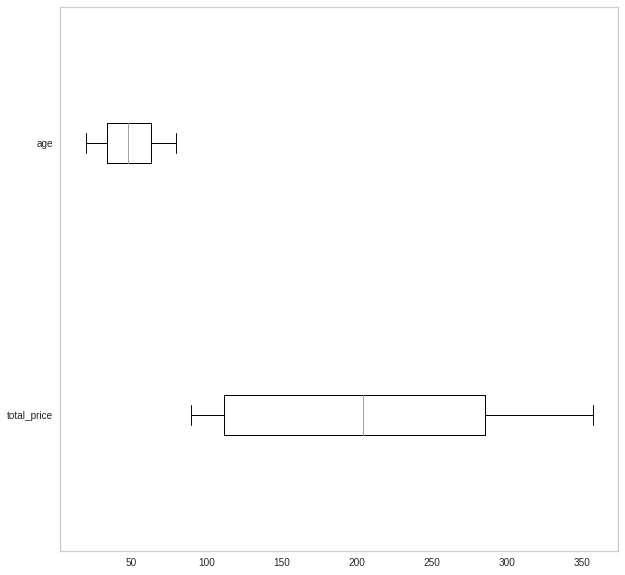

In [ ]:
cosp_df.boxplot(column=['total_price','age'],fontsize=10,rot=0,grid=False,figsize=(10,10),vert=False)

In [ ]:
cosp_df['customer_id'].nunique()

616

In [ ]:
cosp_df.customer_id.value_counts()

571    37
282    32
664    29
348    26
683    26
       ..
747     1
969     1
10      1
802     1
330     1
Name: customer_id, Length: 616, dtype: int64

In [ ]:
numeric = cosp_df.select_dtypes(["int"]).columns
for num_col in numeric:
    print(f"{num_col} : {cosp_df[num_col].nunique()} uniqueness variable(s)")

customer_id : 616 uniqueness variable(s)
age : 61 uniqueness variable(s)
zip_code : 603 uniqueness variable(s)
order_id : 993 uniqueness variable(s)
payment : 988 uniqueness variable(s)
sales_id : 5000 uniqueness variable(s)
product_id : 1233 uniqueness variable(s)
price_per_unit : 23 uniqueness variable(s)
sales_quantity : 3 uniqueness variable(s)
total_price : 69 uniqueness variable(s)
price : 26 uniqueness variable(s)
product_quantity : 41 uniqueness variable(s)


In [ ]:
categorical = cosp_df.select_dtypes(["object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {cosp_df[cat_col].nunique()} uniqueness variable(s)")

customer_name : 616 uniqueness variable(s)
gender : 8 uniqueness variable(s)
home_address : 616 uniqueness variable(s)
city : 604 uniqueness variable(s)
state : 8 uniqueness variable(s)
country : 1 uniqueness variable(s)
product_type : 3 uniqueness variable(s)
product_name : 35 uniqueness variable(s)
size : 5 uniqueness variable(s)
colour : 7 uniqueness variable(s)
description : 1233 uniqueness variable(s)


In [ ]:
# Export as download if in colab
cosp_df.to_csv('cosp_df.csv', index=False)

# **Exploratory Data Analysis (EDA)**

In [ ]:
# check the earliest date of the data
oldest = cosp_df['order_date'].min()
print(oldest)

2021-01-01 00:00:00


In [ ]:
 # check the latest date
newest = cosp_df['order_date'].max()
print(newest)

2021-10-24 00:00:00


In [ ]:
cosp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       5000 non-null   int64         
 1   customer_name     5000 non-null   object        
 2   gender            5000 non-null   object        
 3   age               5000 non-null   int64         
 4   home_address      5000 non-null   object        
 5   zip_code          5000 non-null   int64         
 6   city              5000 non-null   object        
 7   state             5000 non-null   object        
 8   country           5000 non-null   object        
 9   order_id          5000 non-null   int64         
 10  payment           5000 non-null   int64         
 11  order_date        5000 non-null   datetime64[ns]
 12  delivery_date     5000 non-null   datetime64[ns]
 13  sales_id          5000 non-null   int64         
 14  product_id        5000 n

In [ ]:
# Number of user per gender
user_per_gender = cosp_df.groupby('gender')['customer_id'].agg('nunique').reset_index()
user_per_gender.columns = ['gender','Total_user']
user_per_gender

gender  Total_user
0      Agender          76
1     Bigender          69
2       Female          73
3  Genderfluid          87
4  Genderqueer          79
5         Male          82
6   Non-binary          72
7   Polygender          78

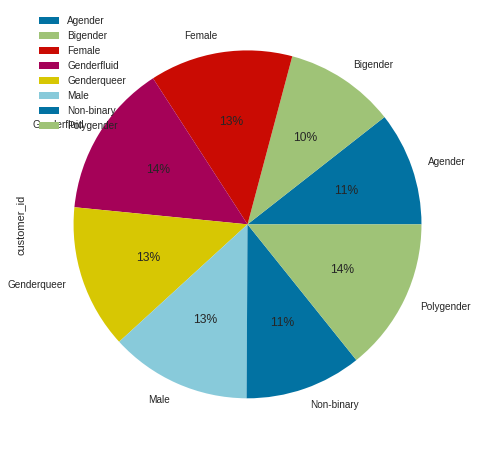

In [ ]:
cosp_df.groupby(['gender']).sum().plot(kind='pie', y='customer_id',autopct='%1.0f%%',figsize=(15, 8))

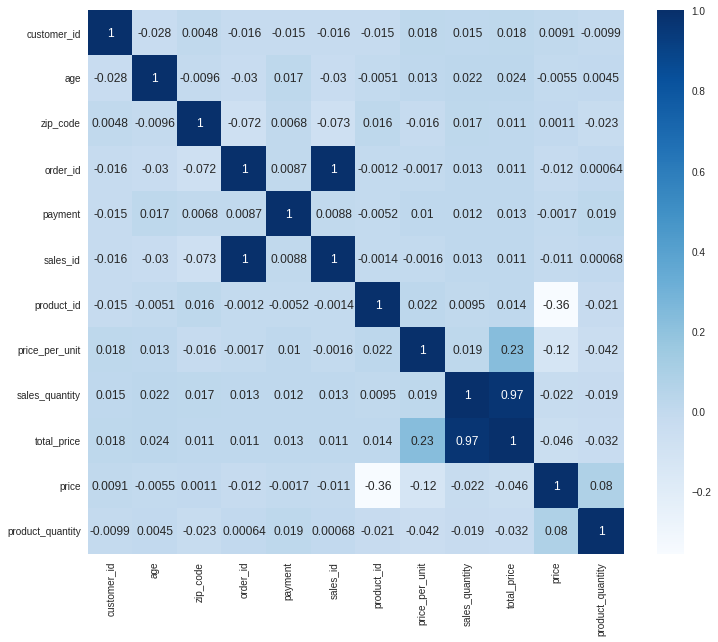

In [ ]:
# View the correlation between 2 variable by using heatmap

ax = plt.figure(figsize=(12,10))
sns.heatmap(cosp_df.corr(),annot=True,cmap="Blues")
plt.show()

In [ ]:
df_1 = cosp_df.groupby([pd.Grouper(key='order_date', freq='m')])['total_price'].sum().reset_index()
df_1

order_date  total_price
0 2021-01-31       119333
1 2021-02-28        95080
2 2021-03-31       131364
3 2021-04-30        97530
4 2021-05-31        85597
5 2021-06-30       101458
6 2021-07-31       116081
7 2021-08-31       104565
8 2021-09-30        96526
9 2021-10-31        84266

In [ ]:
fig = px.line(df_1, x='order_date', y='total_price', text='total_price', title='Number of Monthly total_price')
fig.update_traces(textposition='bottom right')
fig.show()

In [ ]:
# Number of Monthly order
df_2 = cosp_df.groupby([pd.Grouper(key='order_date', freq='m')])['order_id'].count().reset_index()
df_2

order_date  order_id
0 2021-01-31       577
1 2021-02-28       467
2 2021-03-31       635
3 2021-04-30       478
4 2021-05-31       417
5 2021-06-30       501
6 2021-07-31       567
7 2021-08-31       505
8 2021-09-30       458
9 2021-10-31       395

In [ ]:
df_2.order_id.sum()

5000

In [ ]:
fig = px.line(df_2, x='order_date', y='order_id', text='order_id', title='Number of Monthly order_id')
fig.update_traces(textposition='bottom right')
fig.show()

In [ ]:
cosp_df.groupby(['order_id'])['total_price', 'sales_quantity'].agg('sum').reset_index()

order_id  total_price  sales_quantity
0           1         1487              14
1           2         1130              11
2           3          508               5
3           4          976              10
4           5         2043              20
..        ...          ...             ...
988       995         1127              11
989       996         1459              15
990       997          204               2
991       998         1352              13
992       999          440               4

[993 rows x 3 columns]

In [ ]:
# Product sales per month
group = cosp_df.drop(['customer_id',
                      'order_id',
                     'customer_name',
                     'gender',
                     'age',
                     'home_address',
                     'zip_code',
                     'city',
                     'state',
                     'country',
                     'payment',
                     'delivery_date',
                     'sales_id',
                     'product_id',
                     'price_per_unit',
                     'total_price',
                     'size', 
                     'colour',
                     'price',
                     'product_quantity',
                     'description'], axis=1)
group


order_date  sales_quantity product_type     product_name
0    2021-08-30               2        Shirt         Chambray
1    2021-08-30               1       Jacket           Puffer
2    2021-08-30               3        Shirt     Oxford Cloth
3    2021-08-30               2     Trousers             Wool
4    2021-08-30               3       Jacket            Parka
...         ...             ...          ...              ...
4995 2021-05-05               2        Shirt  Mandarin Collar
4996 2021-05-05               3        Shirt             Polo
4997 2021-06-15               1     Trousers           Chinos
4998 2021-06-15               2     Trousers             Wool
4999 2021-06-15               1     Trousers          Cropped

[5000 rows x 4 columns]

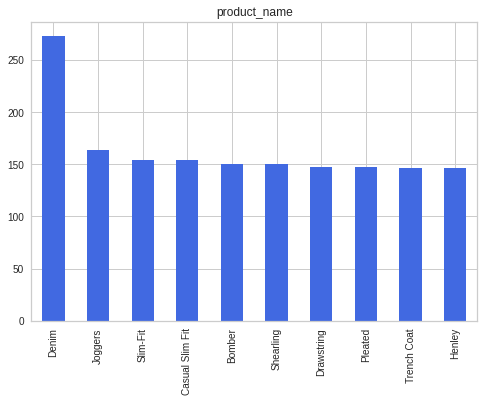

In [ ]:
cosp_df['product_name'].value_counts()[:10].plot(kind='bar', title='product_name', color='royalblue')

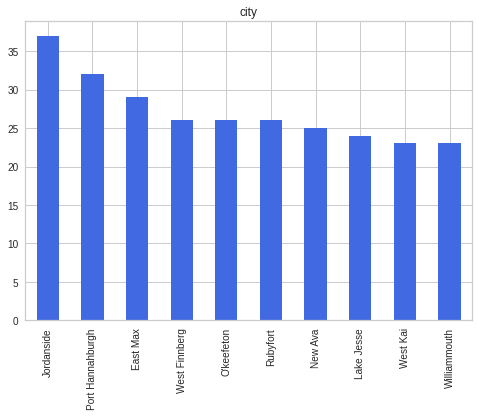

In [ ]:
cosp_df['city'].value_counts()[:10].plot(kind='bar', title='city', color='royalblue')

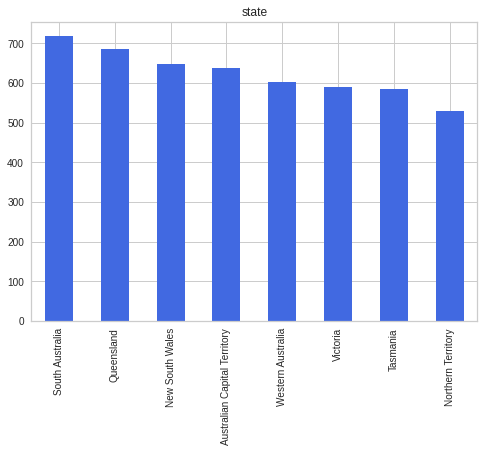

In [ ]:
cosp_df['state'].value_counts()[:10].plot(kind='bar', title='state', color='royalblue')

In [ ]:
groups = cosp_df.groupby("customer_id")["total_price"].sum()
groups2 = groups.nlargest(5)
groups2

customer_id
282    7632
571    6640
664    6341
683    5657
206    5581
Name: total_price, dtype: int64

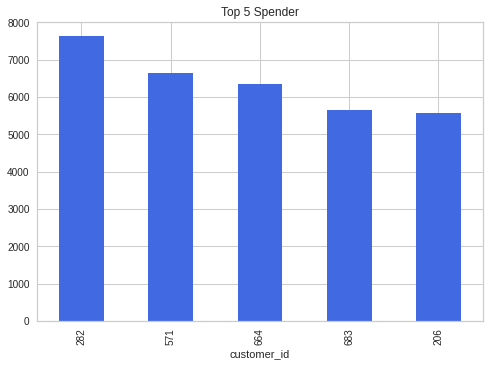

In [ ]:
groups2.plot(kind='bar', title='Top 5 Spender', color='royalblue')
plt.show()

In [ ]:
df_order_price = cosp_df.groupby([pd.Grouper(key='order_date', freq='m'),'order_id'])['total_price', 'sales_quantity'].agg('sum').reset_index()
df_order_price

order_date  order_id  total_price  sales_quantity
0   2021-01-31        18          952               9
1   2021-01-31        20         1557              14
2   2021-01-31        40         1004               9
3   2021-01-31        41          525               5
4   2021-01-31        49          583               6
..         ...       ...          ...             ...
988 2021-10-31       950          858               9
989 2021-10-31       967         1096              11
990 2021-10-31       976          818               8
991 2021-10-31       980         1450              14
992 2021-10-31       981         1420              14

[993 rows x 4 columns]

In [ ]:
df_order_price.groupby(['order_date'])['total_price', 'sales_quantity'].agg('sum')

total_price  sales_quantity
order_date                             
2021-01-31       119333            1143
2021-02-28        95080             920
2021-03-31       131364            1264
2021-04-30        97530             944
2021-05-31        85597             829
2021-06-30       101458             982
2021-07-31       116081            1122
2021-08-31       104565            1008
2021-09-30        96526             936
2021-10-31        84266             814

## Gross Merchandise Value (GMV)

In [ ]:
cosp_df['product'] = cosp_df['product_type'] + '-' + cosp_df['product_name']
cosp_df

customer_id     customer_name       gender  age  \
0              64  Annabella Devote  Genderfluid   75   
1              64  Annabella Devote  Genderfluid   75   
2              64  Annabella Devote  Genderfluid   75   
3              64  Annabella Devote  Genderfluid   75   
4              64  Annabella Devote  Genderfluid   75   
...           ...               ...          ...  ...   
4995          407    Murdock Bulfit         Male   41   
4996          407    Murdock Bulfit         Male   41   
4997          428     Jammal Varcoe   Polygender   66   
4998          428     Jammal Varcoe   Polygender   66   
4999          428     Jammal Varcoe   Polygender   66   

                   home_address  zip_code            city  \
0     4927 Alice MeadowApt. 960      7787  Sanfordborough   
1     4927 Alice MeadowApt. 960      7787  Sanfordborough   
2     4927 Alice MeadowApt. 960      7787  Sanfordborough   
3     4927 Alice MeadowApt. 960      7787  Sanfordborough   
4     4927 Alice MeadowApt. 960      7787  Sanfordborough   
...                         ...       ...             ...   
4995  5233 Lara AvenueSuite 291      8697   Hartmannshire   
4996  5233 Lara AvenueSuite 291      8697   Hartmannshire   
4997  80 Hermiston WaySuite 403      1112  North Liamfort   
4998  80 Hermiston WaySuite 403      1112  North Liamfort   
4999  80 Hermiston WaySuite 403      1112  North Liamfort   

                             state    country  order_id  ...  sales_quantity  \
0                  South Australia  Australia         1  ...               2   
1                  South Australia  Australia         1  ...               1   
2                  South Australia  Australia         1  ...               3   
3                  South Australia  Australia         1  ...               2   
4                  South Australia  Australia         1  ...               3   
...                            ...        ...       ...  ...             ...   
4995                    Queensland  Australia       998  ...               2   
4996                    Queensland  Australia       998  ...               3   
4997  Australian Capital Territory  Australia       999  ...               1   
4998  Australian Capital Territory  Australia       999  ...               2   
4999  Australian Capital Territory  Australia       999  ...               1   

     total_price product_type     product_name  size  colour  price  \
0            212        Shirt         Chambray     L  orange    105   
1            118       Jacket           Puffer     S  indigo    110   
2            288        Shirt     Oxford Cloth     M     red    114   
3            212     Trousers             Wool     M    blue    111   
4            339       Jacket            Parka     S  indigo    119   
...          ...          ...              ...   ...     ...    ...   
4995         218        Shirt  Mandarin Collar     S  orange    108   
4996         285        Shirt             Polo     S  orange    117   
4997         113     Trousers           Chinos     M  violet    100   
4998         212     Trousers             Wool     L   green    111   
4999         115     Trousers          Cropped    XS    blue     99   

      product_quantity                                        description  \
0                   44         A orange coloured, L sized, Chambray Shirt   
1                   62          A indigo coloured, S sized, Puffer Jacket   
2                   54        A red coloured, M sized, Oxford Cloth Shirt   
3                   52            A blue coloured, M sized, Wool Trousers   
4                   53           A indigo coloured, S sized, Parka Jacket   
...                ...                                                ...   
4995                52  A orange coloured, S sized, Mandarin Collar Shirt   
4996                78             A orange coloured, S sized, Polo Shirt   
4997                54        A violet coloured, M sized, Chinos Trousers   
4998

In [ ]:
cosp_df['product'].nunique()

36

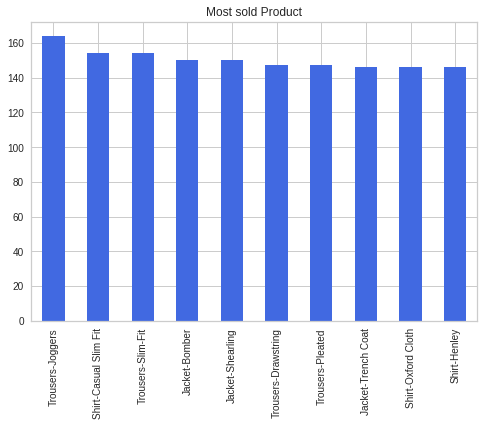

In [ ]:
cosp_df['product'].value_counts()[:10].plot(kind='bar', title='Most sold Product', color='royalblue')

In [ ]:
groups3 = cosp_df.groupby("product")["total_price"].sum()
groups4 = groups3.nlargest(10)
groups4

product
Shirt-Casual Slim Fit    36414
Jacket-Trench Coat       35581
Jacket-Shearling         35334
Jacket-Puffer            35164
Shirt-Flannel            33158
Trousers-Cropped         32660
Trousers-Pleated         32340
Trousers-Joggers         31062
Shirt-Chambray           30740
Jacket-Parka             30397
Name: total_price, dtype: int64

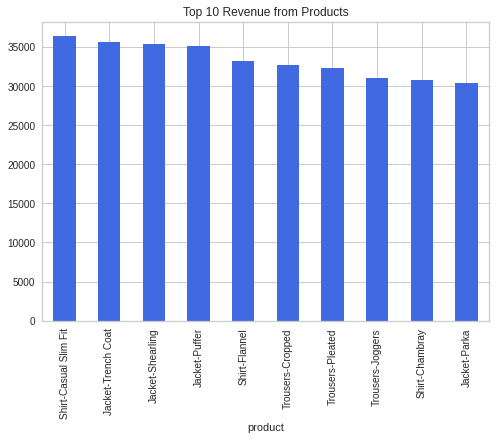

In [ ]:
groups4.plot(kind='bar', title='Top 10 Revenue from Products', color='royalblue')
plt.show()

In [ ]:
groups5 = cosp_df.groupby("customer_id")["total_price"].sum()
group6 = groups5.nlargest(10)
group6

customer_id
282    7632
571    6640
664    6341
683    5657
206    5581
566    5435
348    5119
813    4969
465    4807
727    4428
Name: total_price, dtype: int64

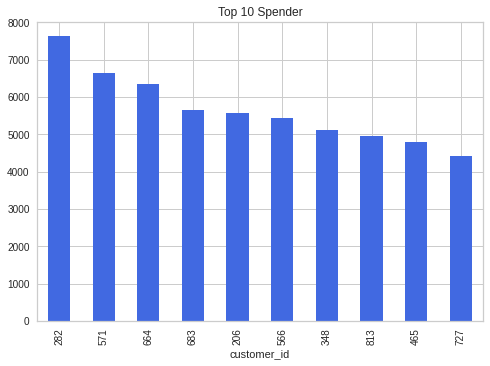

In [ ]:
group6.plot(kind='bar', title='Top 10 Spender', color='royalblue')
plt.show()

# **Clustering Analysis**

# RFM

In [ ]:
rfm = cosp_df.copy().reset_index()
rfm

index  customer_id     customer_name       gender  age  \
0         0           64  Annabella Devote  Genderfluid   75   
1         1           64  Annabella Devote  Genderfluid   75   
2         2           64  Annabella Devote  Genderfluid   75   
3         3           64  Annabella Devote  Genderfluid   75   
4         4           64  Annabella Devote  Genderfluid   75   
...     ...          ...               ...          ...  ...   
4995   4995          407    Murdock Bulfit         Male   41   
4996   4996          407    Murdock Bulfit         Male   41   
4997   4997          428     Jammal Varcoe   Polygender   66   
4998   4998          428     Jammal Varcoe   Polygender   66   
4999   4999          428     Jammal Varcoe   Polygender   66   

                   home_address  zip_code            city  \
0     4927 Alice MeadowApt. 960      7787  Sanfordborough   
1     4927 Alice MeadowApt. 960      7787  Sanfordborough   
2     4927 Alice MeadowApt. 960      7787  Sanfordborough   
3     4927 Alice MeadowApt. 960      7787  Sanfordborough   
4     4927 Alice MeadowApt. 960      7787  Sanfordborough   
...                         ...       ...             ...   
4995  5233 Lara AvenueSuite 291      8697   Hartmannshire   
4996  5233 Lara AvenueSuite 291      8697   Hartmannshire   
4997  80 Hermiston WaySuite 403      1112  North Liamfort   
4998  80 Hermiston WaySuite 403      1112  North Liamfort   
4999  80 Hermiston WaySuite 403      1112  North Liamfort   

                             state    country  ...  sales_quantity  \
0                  South Australia  Australia  ...               2   
1                  South Australia  Australia  ...               1   
2                  South Australia  Australia  ...               3   
3                  South Australia  Australia  ...               2   
4                  South Australia  Australia  ...               3   
...                            ...        ...  ...             ...   
4995                    Queensland  Australia  ...               2   
4996                    Queensland  Australia  ...               3   
4997  Australian Capital Territory  Australia  ...               1   
4998  Australian Capital Territory  Australia  ...               2   
4999  Australian Capital Territory  Australia  ...               1   

      total_price product_type     product_name  size  colour  price  \
0             212        Shirt         Chambray     L  orange    105   
1             118       Jacket           Puffer     S  indigo    110   
2             288        Shirt     Oxford Cloth     M     red    114   
3             212     Trousers             Wool     M    blue    111   
4             339       Jacket            Parka     S  indigo    119   
...           ...          ...              ...   ...     ...    ...   
4995          218        Shirt  Mandarin Collar     S  orange    108   
4996          285        Shirt             Polo     S  orange    117   
4997          113     Trousers           Chinos     M  violet    100   
4998          212     Trousers             Wool     L   green    111   
4999          115     Trousers          Cropped    XS    blue     99   

      product_quantity                                        description  \
0                   44         A orange coloured, L sized, Chambray Shirt   
1                   62          A indigo coloured, S sized, Puffer Jacket   
2                   54        A red coloured, M sized, Oxford Cloth Shirt   
3                   52            A blue coloured, M sized, Wool Trousers   
4                   53           A indigo coloured, S sized, Parka Jacket   
...                ...                                                ...   
4995                52  A orange coloured, S sized, Mandarin Collar Shirt   
4996                78             A orange coloured, S sized, Polo Shirt   
4997                54        A violet coloured, M sized, Chinos Trousers   
4998                42      

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             5000 non-null   int64         
 1   customer_id       5000 non-null   int64         
 2   customer_name     5000 non-null   object        
 3   gender            5000 non-null   object        
 4   age               5000 non-null   int64         
 5   home_address      5000 non-null   object        
 6   zip_code          5000 non-null   int64         
 7   city              5000 non-null   object        
 8   state             5000 non-null   object        
 9   country           5000 non-null   object        
 10  order_id          5000 non-null   int64         
 11  payment           5000 non-null   int64         
 12  order_date        5000 non-null   datetime64[ns]
 13  delivery_date     5000 non-null   datetime64[ns]
 14  sales_id          5000 n

In [ ]:
# Create snapshot date
snapshot_date = rfm['order_date'].max() + timedelta(days=1)
print(snapshot_date)

2021-10-25 00:00:00


In [ ]:
# Grouping by user_id
RFM_Preprocess = rfm.groupby(['customer_id']).agg({
        'order_date': lambda x: (snapshot_date - x.max()).days,
        'customer_id': 'count',
        'total_price': 'sum'})

In [ ]:
# Renaming the columns 
RFM_Preprocess.rename(columns={'order_date': 'Recency',
                         'customer_id': 'Frequency',
                         'total_price': 'Monetary'}, inplace=True)

In [ ]:
RFM_Preprocess.head()

Recency  Frequency  Monetary
customer_id                              
1                204          8      1641
7                157          5      1017
10               230          1       270
11               150          2       382
12               128          8      1551

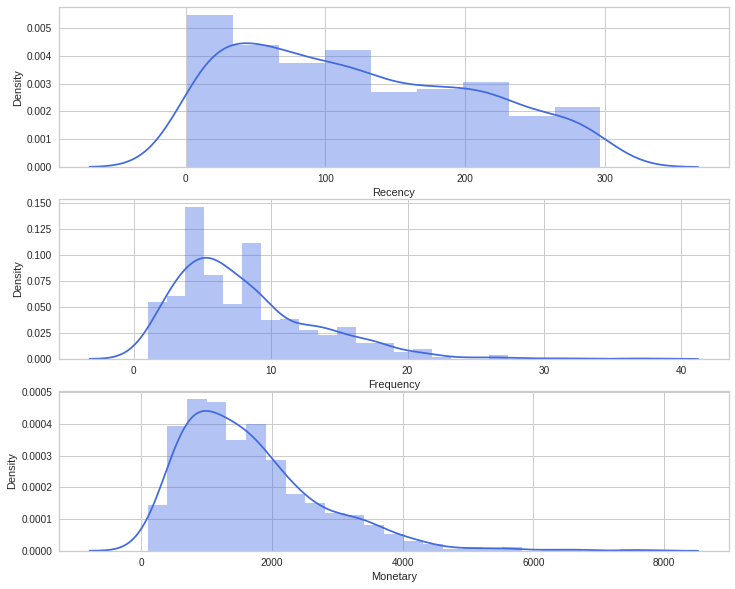

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFM_Preprocess['Recency'], color="royalblue")
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFM_Preprocess['Frequency'], color='royalblue')
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFM_Preprocess['Monetary'], color="royalblue")
# Show the plot
plt.show()

In [ ]:
quantile = RFM_Preprocess.quantile(q=[0.3, 0.7])
quantile

Recency  Frequency  Monetary
0.3     62.0        5.0     979.0
0.7    175.0        9.0    2015.5

In [ ]:
quantile.to_dict()

{'Recency': {0.3: 62.0, 0.7: 175.0},
 'Frequency': {0.3: 5.0, 0.7: 9.0},
 'Monetary': {0.3: 979.0, 0.7: 2015.5}}

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.3]:
        return 3
    elif x <= d[p][0.7]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.3]:
        return 1
    elif x <= d[p][0.7]:
        return 2
    else:
        return 3

In [ ]:
RFM_Segmentation = RFM_Preprocess
RFM_Segmentation['R_Score'] = RFM_Segmentation['Recency'].apply(RScore, args=('Recency',quantile))
RFM_Segmentation['F_Score'] = RFM_Segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
RFM_Segmentation['M_Score'] = RFM_Segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [ ]:
RFM_Segmentation.head()

Recency  Frequency  Monetary  R_Score  F_Score  M_Score
customer_id                                                         
1                204          8      1641        1        2        2
7                157          5      1017        2        1        2
10               230          1       270        1        1        1
11               150          2       382        2        1        1
12               128          8      1551        2        2        2

In [ ]:
RFM_Segmentation.describe()

Recency   Frequency     Monetary     R_Score     F_Score     M_Score
count  616.000000  616.000000   616.000000  616.000000  616.000000  616.000000
mean   123.469156    8.116883  1675.000000    2.001623    1.933442    2.000000
std     84.326017    5.113283  1069.724092    0.776691    0.810772    0.775646
min      1.000000    1.000000   100.000000    1.000000    1.000000    1.000000
25%     51.750000    4.000000   878.250000    1.000000    1.000000    1.000000
50%    111.500000    7.000000  1439.000000    2.000000    2.000000    2.000000
75%    192.000000   10.000000  2165.000000    3.000000    3.000000    3.000000
max    297.000000   37.000000  7632.000000    3.000000    3.000000    3.000000

In [ ]:
RFM_Segmentation['RFM_Score'] = RFM_Segmentation.R_Score.map(str) \
                            + RFM_Segmentation.F_Score.map(str) \
                            + RFM_Segmentation.M_Score.map(str)

In [ ]:
# Define RFM Segmentation function
def RFM_Segment(df):
  if df['RFM_Score'] == '333':
    return 'Champions'
  elif df['RFM_Score'] == '332':
    return 'Champions'
  elif df['RFM_Score'] == '331':
    return 'Potential High Customer'
  elif df['RFM_Score'] == '323':
    return 'Champions'
  elif df['RFM_Score'] == '322':
    return 'Potential High Customer'
  elif df['RFM_Score'] == '321':
    return 'General Customer'
  elif df['RFM_Score'] == '313':
    return 'General Customer'
  elif df['RFM_Score'] == '312':
    return 'General Customer'
  elif df['RFM_Score'] == '311':
    return 'General Customer'
  elif df['RFM_Score'] == '233':
    return 'Champions'
  elif df['RFM_Score'] == '232':
    return 'Potential High Customer'
  elif df['RFM_Score'] == '231':
    return 'General Customer' 
  elif df['RFM_Score'] == '223':
    return 'Potential High Customer'
  elif df['RFM_Score'] == '222':
    return 'General Customer'
  elif df['RFM_Score'] == '221':
    return 'About to Sleep' 
  elif df['RFM_Score'] == '213':
    return 'General Customer'
  elif df['RFM_Score'] == '212':
    return 'About to Sleep'
  elif df['RFM_Score'] == '211':
    return 'About to Sleep'
  elif df['RFM_Score'] == '133':
    return 'Customer Needing Attention'
  elif df['RFM_Score'] == '132':
    return 'Customer Needing Attention'
  elif df['RFM_Score'] == '131':
    return 'About to Sleep'
  elif df['RFM_Score'] == '123':
    return 'Customer Needing Attention'
  elif df['RFM_Score'] == '122':
    return 'Customer Needing Attention'
  elif df['RFM_Score'] == '121':
    return 'About to Sleep'
  elif df['RFM_Score'] == '113':
    return 'About to Sleep'
  elif df['RFM_Score'] == '112':
    return 'About to Sleep'
  else:
    return 'About to Sleep'

# Create a new variable RFM_Segment
RFM_Segmentation['RFM_Segment'] = RFM_Segmentation.apply(RFM_Segment, axis=1)
# Print the header with top 5 rows to the console
RFM_Segmentation.head()

Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
customer_id                                                            
1                204          8      1641        1        2        2   
7                157          5      1017        2        1        2   
10               230          1       270        1        1        1   
11               150          2       382        2        1        1   
12               128          8      1551        2        2        2   

            RFM_Score                 RFM_Segment  
customer_id                                        
1                 122  Customer Needing Attention  
7                 212              About to Sleep  
10                111              About to Sleep  
11                211              About to Sleep  
12                222            General Customer

In [ ]:
# Best Clients
RFM_Segmentation[RFM_Segmentation['RFM_Score'] == '333'].sort_values('Monetary', ascending=False).head(10)

Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
customer_id                                                            
664               21         29      6341        3        3        3   
566                6         26      5435        3        3        3   
348               25         26      5119        3        3        3   
813               31         21      4969        3        3        3   
727                4         21      4428        3        3        3   
129               17         21      4399        3        3        3   
107               17         20      4385        3        3        3   
732               18         18      4240        3        3        3   
623               26         20      4214        3        3        3   
908                3         18      4071        3        3        3   

            RFM_Score RFM_Segment  
customer_id                        
664               333   Champions  
566               333   Champions  
348               333   Champions  
813               333   Champions  
727               333   Champions  
129               333   Champions  
107               333   Champions  
732               333   Champions  
623               333   Champions  
908               333   Champions

In [ ]:
# Calculate average values for each RFM_Segment, and return a size of each segment 
RFM_level_agg = RFM_Segmentation.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(RFM_level_agg)

                           Recency Frequency Monetary      
                              mean      mean     mean count
RFM_Segment                                                
About to Sleep               175.4       3.7    755.1   184
Champions                     62.6      14.7   3025.4   151
Customer Needing Attention   228.4       9.2   1918.1    91
General Customer              81.4       5.8   1208.3   119
Potential High Customer       54.3       7.9   1657.7    71


In [ ]:
RFM_Segmentation["RFM_Segment"].value_counts()

About to Sleep                184
Champions                     151
General Customer              119
Customer Needing Attention     91
Potential High Customer        71
Name: RFM_Segment, dtype: int64

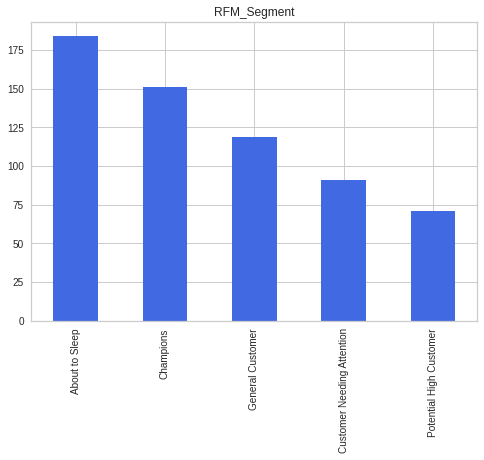

In [ ]:
RFM_Segmentation['RFM_Segment'].value_counts().plot(kind='bar', title='RFM_Segment', color='royalblue')

In [ ]:
RFM_df = RFM_Segmentation.drop(['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score'], axis=1)
RFM_df

RFM_Segment
customer_id                            
1            Customer Needing Attention
7                        About to Sleep
10                       About to Sleep
11                       About to Sleep
12                     General Customer
...                                 ...
994          Customer Needing Attention
995                           Champions
996                           Champions
998                           Champions
1000            Potential High Customer

[616 rows x 1 columns]

In [ ]:
# Left join the dataframe
df_RFM = pd.merge(rfm,RFM_df,on='customer_id',how='left')
df_RFM

index  customer_id     customer_name       gender  age  \
0         0           64  Annabella Devote  Genderfluid   75   
1         1           64  Annabella Devote  Genderfluid   75   
2         2           64  Annabella Devote  Genderfluid   75   
3         3           64  Annabella Devote  Genderfluid   75   
4         4           64  Annabella Devote  Genderfluid   75   
...     ...          ...               ...          ...  ...   
4995   4995          407    Murdock Bulfit         Male   41   
4996   4996          407    Murdock Bulfit         Male   41   
4997   4997          428     Jammal Varcoe   Polygender   66   
4998   4998          428     Jammal Varcoe   Polygender   66   
4999   4999          428     Jammal Varcoe   Polygender   66   

                   home_address  zip_code            city  \
0     4927 Alice MeadowApt. 960      7787  Sanfordborough   
1     4927 Alice MeadowApt. 960      7787  Sanfordborough   
2     4927 Alice MeadowApt. 960      7787  Sanfordborough   
3     4927 Alice MeadowApt. 960      7787  Sanfordborough   
4     4927 Alice MeadowApt. 960      7787  Sanfordborough   
...                         ...       ...             ...   
4995  5233 Lara AvenueSuite 291      8697   Hartmannshire   
4996  5233 Lara AvenueSuite 291      8697   Hartmannshire   
4997  80 Hermiston WaySuite 403      1112  North Liamfort   
4998  80 Hermiston WaySuite 403      1112  North Liamfort   
4999  80 Hermiston WaySuite 403      1112  North Liamfort   

                             state    country  ...  total_price  product_type  \
0                  South Australia  Australia  ...          212         Shirt   
1                  South Australia  Australia  ...          118        Jacket   
2                  South Australia  Australia  ...          288         Shirt   
3                  South Australia  Australia  ...          212      Trousers   
4                  South Australia  Australia  ...          339        Jacket   
...                            ...        ...  ...          ...           ...   
4995                    Queensland  Australia  ...          218         Shirt   
4996                    Queensland  Australia  ...          285         Shirt   
4997  Australian Capital Territory  Australia  ...          113      Trousers   
4998  Australian Capital Territory  Australia  ...          212      Trousers   
4999  Australian Capital Territory  Australia  ...          115      Trousers   

         product_name size  colour  price  product_quantity  \
0            Chambray    L  orange    105                44   
1              Puffer    S  indigo    110                62   
2        Oxford Cloth    M     red    114                54   
3                Wool    M    blue    111                52   
4               Parka    S  indigo    119                53   
...               ...  ...     ...    ...               ...   
4995  Mandarin Collar    S  orange    108                52   
4996             Polo    S  orange    117                78   
4997           Chinos    M  violet    100                54   
4998             Wool    L   green    111                42   
4999          Cropped   XS    blue     99                47   

                                            description  \
0            A orange coloured, L sized, Chambray Shirt   
1             A indigo coloured, S sized, Puffer Jacket   
2           A red coloured, M sized, Oxford Cloth Shirt   
3               A blue coloured, M sized, Wool Trousers   
4              A indigo coloured, S sized, Parka Jacket   
...                                                 ...   
4995  A orange coloured, S sized, Mandarin Collar Shirt   
4996             A orange coloured, S sized, Polo Shirt   
4997        A violet coloured, M sized, Chinos Trousers   
4998           A green coloured, L sized, Wool Trousers   
4999        A blue coloured, XS sized, Cropped Trousers   

                    product              RFM_Segment  
0         

In [ ]:
df_RFM["RFM_Segment"].value_counts()

Champions                     2223
Customer Needing Attention     835
General Customer               692
About to Sleep                 686
Potential High Customer        564
Name: RFM_Segment, dtype: int64

In [ ]:
df_RFM.groupby(['RFM_Segment']).agg(['mean','min','max','std'])

index                        customer_id  \
                                   mean min   max          std        mean   
RFM_Segment                                                                  
About to Sleep              2536.102041  32  4999  1479.354189  503.679300   
Champions                   2569.542510   6  4980  1418.612715  516.311741   
Customer Needing Attention  2433.579641  20  4988  1467.752946  487.341317   
General Customer            2255.300578  64  4996  1471.746541  487.602601   
Potential High Customer     2576.124113   0  4886  1392.961461  505.636525   

                                                        age      ...  \
                           min   max         std       mean min  ...   
RFM_Segment                                                      ...   
About to Sleep               7   993  299.703726  49.507289  20  ...   
Champions                   15   998  261.777123  47.246064  20  ...   
Customer Needing Attention   1   994  268.397598  49.711377  20  ...   
General Customer            12   989  298.298231  48.978324  20  ...   
Potential High Customer     20  1000  286.096384  52.145390  21  ...   

                           total_price                  price           \
                                   max        std        mean min  max   
RFM_Segment                                                              
About to Sleep                     357  84.817747  105.594752  90  119   
Champions                          357  85.982619  105.804318  90  119   
Customer Needing Attention         357  87.648727  105.366467  90  119   
General Customer                   357  86.068894  105.804913  90  119   
Potential High Customer            357  88.177289  105.475177  90  119   

                                      product_quantity                     
                                  std             mean min max        std  
RFM_Segment                                                                
About to Sleep               9.856884        60.278426  40  80  11.929833  
Champions                    9.646681        59.956815  40  80  11.578788  
Customer Needing Attention   9.839471        59.864671  40  80  11.794285  
General Customer             9.550283        60.349711  40  80  11.722637  
Potential High Customer     10.022945        60.342199  40  80  11.597219  

[5 rows x 52 columns]

In [ ]:
# create a list of our conditions
conditions = [
    (df_RFM['age'] <= 24),
    (df_RFM['age'] > 24) & (df_RFM['age'] <= 40),
    (df_RFM['age'] > 40) & (df_RFM['age'] <= 55),
    (df_RFM['age'] > 55)
    ]

# create a list of the values we want to assign for each condition
values = ['Gen_Z','Gen_Milenial','Gen_X','Baby_Boomer']

# create a new column and use np.select to assign values to it using our lists as arguments
df_RFM['Generation'] = np.select(conditions, values)

# display updated DataFrame
df_RFM.head()


index  customer_id     customer_name       gender  age  \
0      0           64  Annabella Devote  Genderfluid   75   
1      1           64  Annabella Devote  Genderfluid   75   
2      2           64  Annabella Devote  Genderfluid   75   
3      3           64  Annabella Devote  Genderfluid   75   
4      4           64  Annabella Devote  Genderfluid   75   

                home_address  zip_code            city            state  \
0  4927 Alice MeadowApt. 960      7787  Sanfordborough  South Australia   
1  4927 Alice MeadowApt. 960      7787  Sanfordborough  South Australia   
2  4927 Alice MeadowApt. 960      7787  Sanfordborough  South Australia   
3  4927 Alice MeadowApt. 960      7787  Sanfordborough  South Australia   
4  4927 Alice MeadowApt. 960      7787  Sanfordborough  South Australia   

     country  ...  product_type  product_name size  colour  price  \
0  Australia  ...         Shirt      Chambray    L  orange    105   
1  Australia  ...        Jacket        Puffer    S  indigo    110   
2  Australia  ...         Shirt  Oxford Cloth    M     red    114   
3  Australia  ...      Trousers          Wool    M    blue    111   
4  Australia  ...        Jacket         Parka    S  indigo    119   

   product_quantity                                  description  \
0                44   A orange coloured, L sized, Chambray Shirt   
1                62    A indigo coloured, S sized, Puffer Jacket   
2                54  A red coloured, M sized, Oxford Cloth Shirt   
3                52      A blue coloured, M sized, Wool Trousers   
4                53     A indigo coloured, S sized, Parka Jacket   

              product              RFM_Segment   Generation  
0      Shirt-Chambray  Potential High Customer  Baby_Boomer  
1       Jacket-Puffer  Potential High Customer  Baby_Boomer  
2  Shirt-Oxford Cloth  Potential High Customer  Baby_Boomer  
3       Trousers-Wool  Potential High Customer  Baby_Boomer  
4        Jacket-Parka  Potential High Customer  Baby_Boomer  

[5 rows x 29 columns]

In [ ]:
df_age = df_RFM.groupby(['RFM_Segment','Generation'])['customer_id'].count()
pd.DataFrame(data=df_age).sort_values(by=['RFM_Segment','customer_id'], ascending=False)

customer_id
RFM_Segment                Generation               
Potential High Customer    Baby_Boomer           284
                           Gen_X                 124
                           Gen_Milenial           95
                           Gen_Z                  61
General Customer           Baby_Boomer           261
                           Gen_X                 201
                           Gen_Milenial          160
                           Gen_Z                  70
Customer Needing Attention Baby_Boomer           334
                           Gen_Milenial          250
                           Gen_X                 201
                           Gen_Z                  50
Champions                  Baby_Boomer           825
                           Gen_Milenial          705
                           Gen_X                 469
                           Gen_Z                 224
About to Sleep             Baby_Boomer           254
                           Gen_Milenial          188
                           Gen_X                 188
                           Gen_Z                  56

Rekomendasi:
Meningkatkan sales untuk gen x dan gen z

In [ ]:
# Client frequency
Freq_Client_df = RFM_Segmentation.drop(['Recency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score'], axis=1)
Freq_Client_df

Frequency                 RFM_Segment
customer_id                                       
1                    8  Customer Needing Attention
7                    5              About to Sleep
10                   1              About to Sleep
11                   2              About to Sleep
12                   8            General Customer
...                ...                         ...
994                  7  Customer Needing Attention
995                 10                   Champions
996                 13                   Champions
998                 21                   Champions
1000                 6     Potential High Customer

[616 rows x 2 columns]

In [ ]:
groups = df_RFM.groupby("customer_id")["total_price"].sum()
groups2 = groups.nlargest(5)
groups2

customer_id
282    7632
571    6640
664    6341
683    5657
206    5581
Name: total_price, dtype: int64

In [ ]:
# Top spender and their segment
Top_spender = pd.merge(Freq_Client_df,groups2, on='customer_id',how='right')
Top_spender

Frequency RFM_Segment  total_price
customer_id                                    
282                 32   Champions         7632
571                 37   Champions         6640
664                 29   Champions         6341
683                 26   Champions         5657
206                 23   Champions         5581

In [ ]:
# Most Loyal client and their segment
Loyal_client = pd.merge(Freq_Client_df,groups2, on='customer_id',how='right')
Most_loyal_client = Loyal_client.drop(['total_price'], axis=1)
Most_loyal_client.sort_values(by=['Frequency'], ascending=False)

Frequency RFM_Segment
customer_id                       
571                 37   Champions
282                 32   Champions
664                 29   Champions
683                 26   Champions
206                 23   Champions

In [ ]:
# Customer Persona
df_persona = df_RFM.drop(['customer_id',
                          'index',
                          'customer_name',
                          'gender',
                          'home_address',
                          'zip_code',
                          'city',
                          'state',
                          'country',
                          'order_id',
                          'payment',
                          'order_date',
                          'delivery_date',
                          'sales_id',
                          'product_id',
                          'price_per_unit',
                          'sales_quantity',
                          'product_type',
                          'product_name',
                          'size', 
                          'colour',
                          'price',
                          'product_quantity',
                          'description',
                          'Generation'], axis=1)
df_persona


age  total_price                product              RFM_Segment
0      75          212         Shirt-Chambray  Potential High Customer
1      75          118          Jacket-Puffer  Potential High Customer
2      75          288     Shirt-Oxford Cloth  Potential High Customer
3      75          212          Trousers-Wool  Potential High Customer
4      75          339           Jacket-Parka  Potential High Customer
...   ...          ...                    ...                      ...
4995   41          218  Shirt-Mandarin Collar         General Customer
4996   41          285             Shirt-Polo         General Customer
4997   66          113        Trousers-Chinos           About to Sleep
4998   66          212          Trousers-Wool           About to Sleep
4999   66          115       Trousers-Cropped           About to Sleep

[5000 rows x 4 columns]

In [ ]:
df_persona.groupby(['RFM_Segment']).agg(['mean','min','max','std'])

age                    total_price           \
                                 mean min max        std        mean min  max   
RFM_Segment                                                                     
About to Sleep              49.507289  20  80  17.165041  202.540816  90  357   
Champions                   47.246064  20  80  17.455439  205.500675  90  357   
Customer Needing Attention  49.711377  20  80  18.112341  209.039521  90  357   
General Customer            48.978324  20  80  17.428401  207.783237  90  357   
Potential High Customer     52.145390  21  80  17.349304  208.679078  90  357   

                                       
                                  std  
RFM_Segment                            
About to Sleep              84.817747  
Champions                   85.982619  
Customer Needing Attention  87.648727  
General Customer            86.068894  
Potential High Customer     88.177289

In [ ]:
# Customer Persona Object data type
df_persona2 = df_RFM.drop(['customer_id',
                          'index',
                          'age',
                          'customer_name',
                          'zip_code',
                          'country',
                          'order_id',
                          'payment',
                          'order_date',
                          'delivery_date',
                          'sales_id',
                          'product_id',
                          'price_per_unit',
                          'sales_quantity',
                           'total_price',
                           'product_type',
                          'product_name',
                          'price',
                          'product_quantity',
                          'size',
                          'colour',
                          'city',
                           'description',
                           'Generation',
                           'home_address'], axis=1)
df_persona2


gender                         state                product  \
0     Genderfluid               South Australia         Shirt-Chambray   
1     Genderfluid               South Australia          Jacket-Puffer   
2     Genderfluid               South Australia     Shirt-Oxford Cloth   
3     Genderfluid               South Australia          Trousers-Wool   
4     Genderfluid               South Australia           Jacket-Parka   
...           ...                           ...                    ...   
4995         Male                    Queensland  Shirt-Mandarin Collar   
4996         Male                    Queensland             Shirt-Polo   
4997   Polygender  Australian Capital Territory        Trousers-Chinos   
4998   Polygender  Australian Capital Territory          Trousers-Wool   
4999   Polygender  Australian Capital Territory       Trousers-Cropped   

                  RFM_Segment  
0     Potential High Customer  
1     Potential High Customer  
2     Potential High Customer  
3     Potential High Customer  
4     Potential High Customer  
...                       ...  
4995         General Customer  
4996         General Customer  
4997           About to Sleep  
4998           About to Sleep  
4999           About to Sleep  

[5000 rows x 4 columns]

In [ ]:
df_persona2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       5000 non-null   object
 1   state        5000 non-null   object
 2   product      5000 non-null   object
 3   RFM_Segment  5000 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


In [ ]:
df_persona2.groupby(['RFM_Segment']).describe()

gender                         state         \
                            count unique         top freq count unique   
RFM_Segment                                                              
About to Sleep                686      8     Agender  138   686      8   
Champions                    2223      8      Female  411  2223      8   
Customer Needing Attention    835      8  Non-binary  141   835      8   
General Customer              692      8    Bigender  121   692      8   
Potential High Customer       564      8  Non-binary   89   564      8   

                                                              product         \
                                                     top freq   count unique   
RFM_Segment                                                                    
About to Sleep              Australian Capital Territory  103     686     36   
Champions                   Australian Capital Territory  353    2223     36   
Customer Needing Attention               South Australia  147     835     36   
General Customer                              Queensland  108     692     36   
Potential High Customer               Northern Territory  114     564     36   

                                                        
                                              top freq  
RFM_Segment                                             
About to Sleep                   Trousers-Joggers   27  
Champions                       Trousers-Slim-Fit   76  
Customer Needing Attention  Shirt-Casual Slim Fit   36  
General Customer            Trousers-High-Waisted   27  
Potential High Customer          Trousers-Pleated   23

In [ ]:
# Export as download if in colab
df_RFM.to_csv('df_RFM.csv', index=False)